In [1]:
#import some necessary liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
data=pd.read_csv(r"E:\data trained projects\Evaluation Projects\assignment 1\baseball.csv")

In [3]:
data.head()

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

In [4]:
# statistical Info
#if we look at the dataset there is huge difference between mean and standard deviation
data.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

In [5]:
#data type info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
#check for null values
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

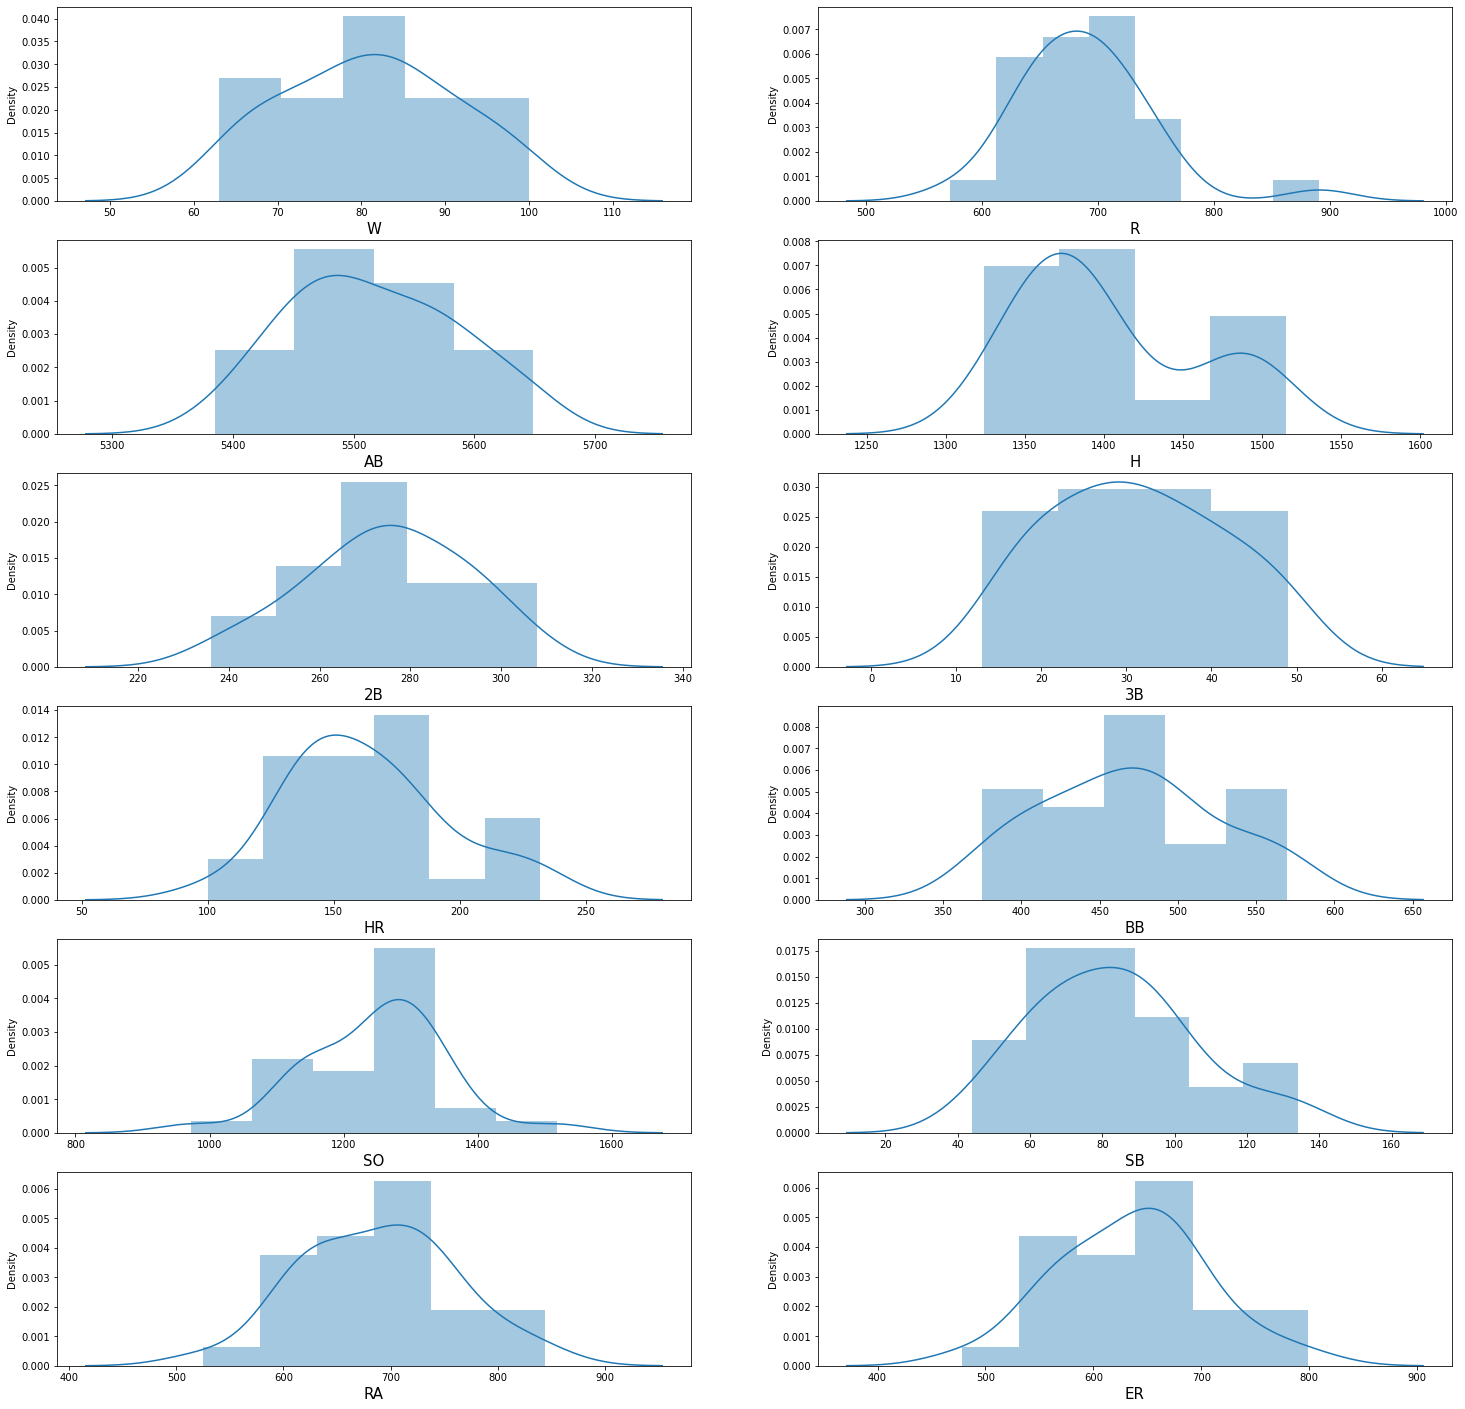

In [7]:
# from the visualization it shows that R feature is highly right skewed
plt.figure(figsize=(25,25))
graph=1
for column in data:
    if graph<=12:
        ax=plt.subplot(6,2,graph)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [8]:
# now scaling of data 
from sklearn.preprocessing import StandardScaler

In [9]:
x=data.drop(columns=['W'],axis=1)
y=data['W']

In [10]:
scaler=StandardScaler()

In [11]:
x_scaled=scaler.fit_transform(x)

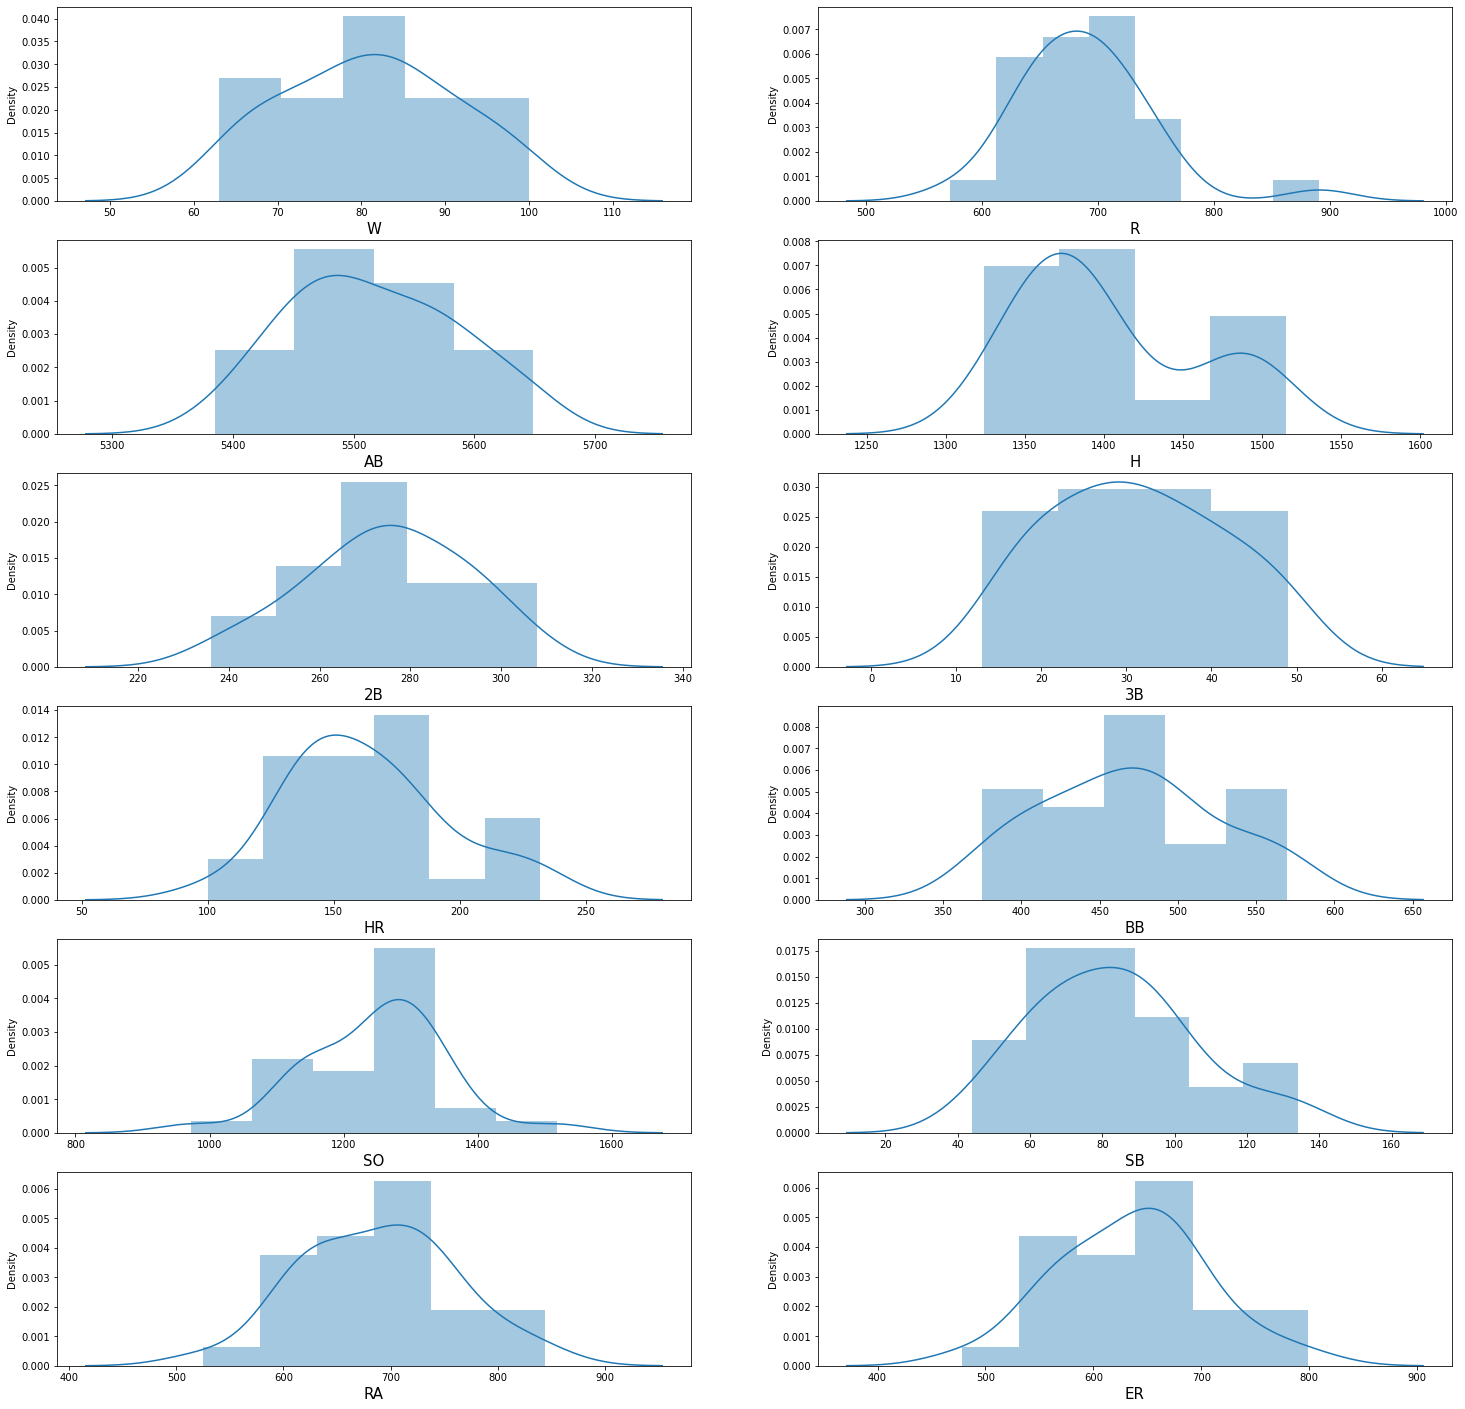

In [12]:
plt.figure(figsize=(25,25))
graph=1
for column in data:
    if graph<=12:
        ax=plt.subplot(6,2,graph)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

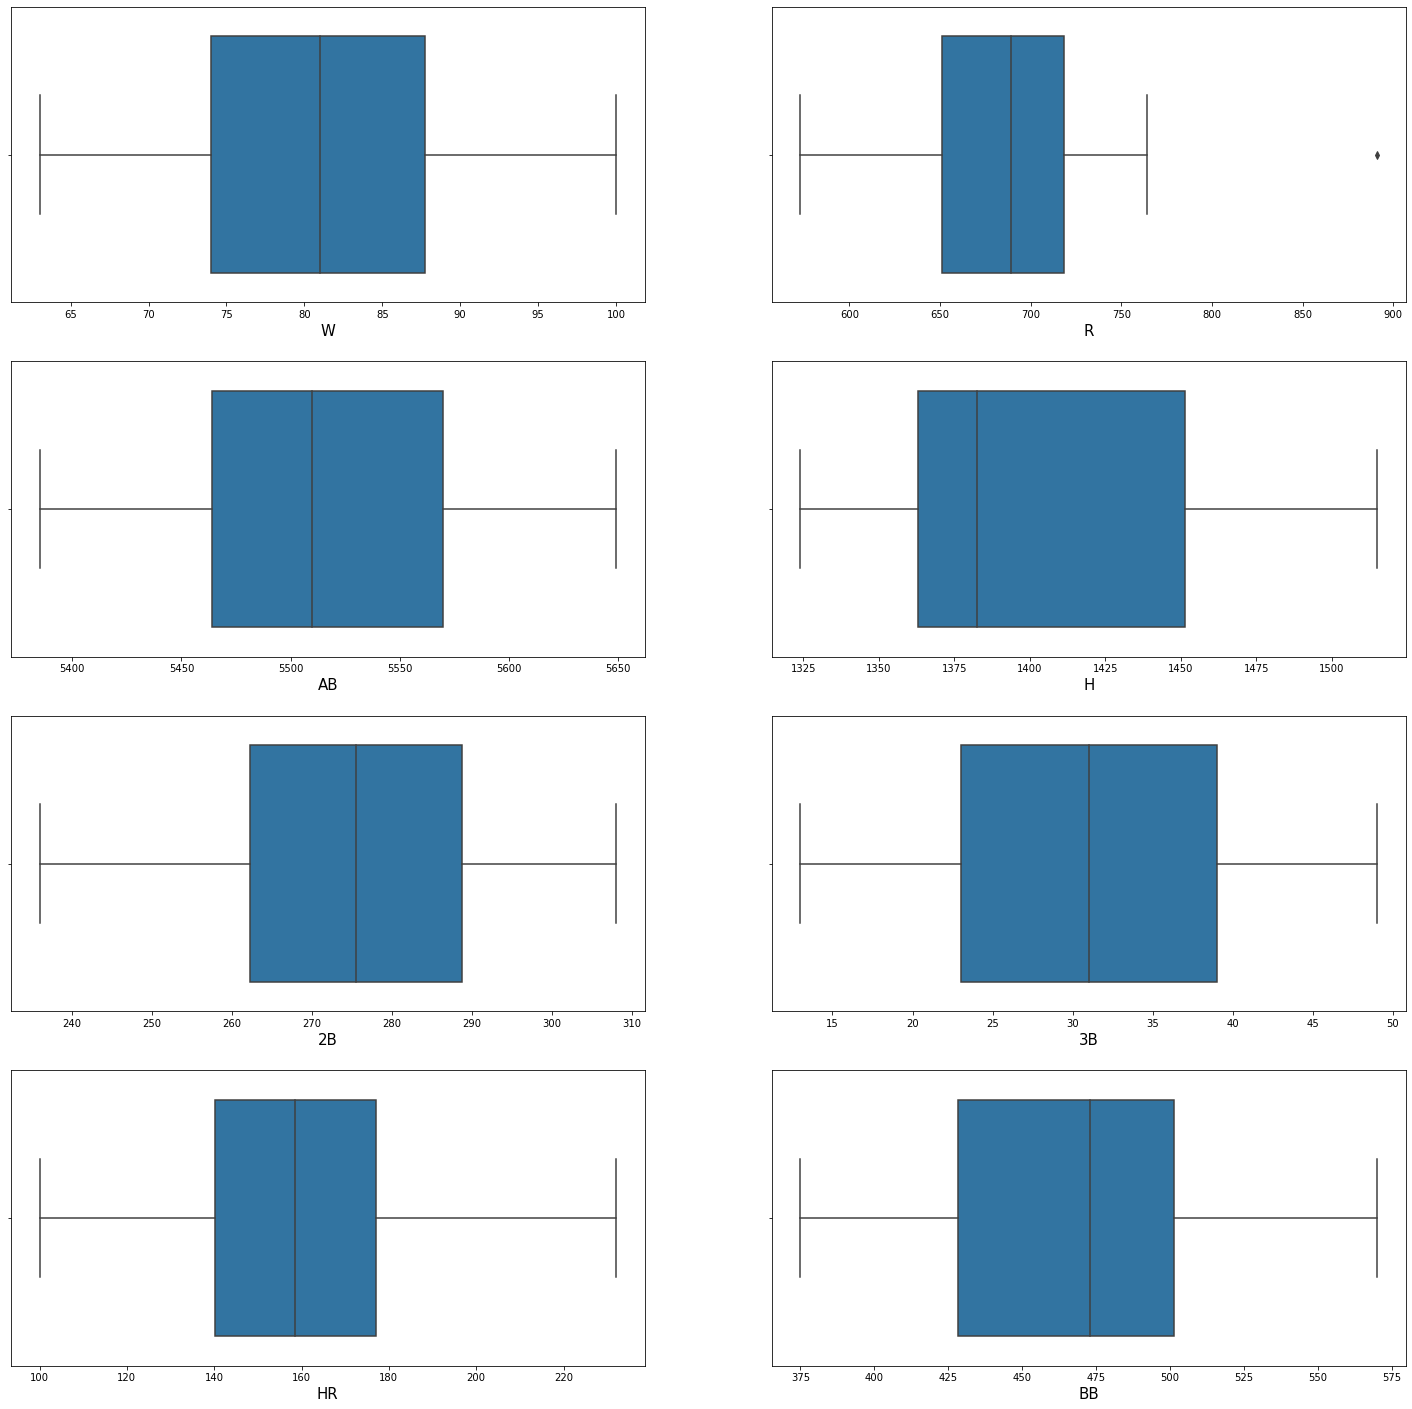

In [13]:
# from the below visualization of boxplot it shows that there is outlier in R feature
plt.figure(figsize=(25,25))
graph=1
for column in data:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [14]:
# data before removing the outlier
data.shape

(30, 17)

In [15]:
from scipy.stats import zscore
z_score=zscore(data[['R']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score < 3).all(axis=1)

data=data[filtering_entry]

<AxesSubplot:xlabel='R'>

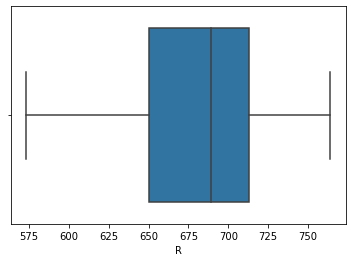

In [16]:
sns.boxplot(data['R'],orient='v')

In [17]:
# data shape after removing the outlier
data.shape

(29, 17)

In [18]:
#after removing outlier there is loss of one row which is 3% of dataset

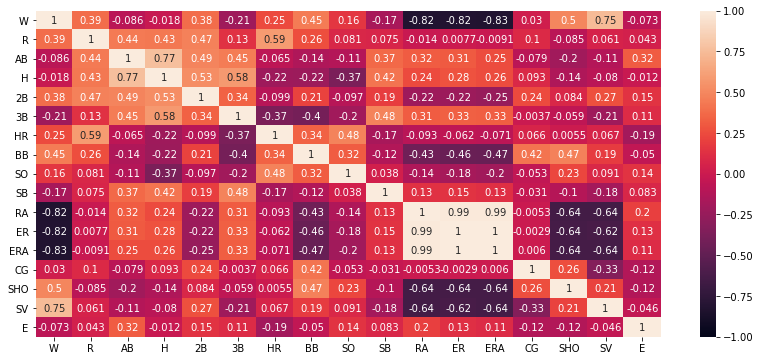

In [19]:
#coorelation matrix
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [20]:
#from the above coorelation matrix it showS that features H and AB,RA and ERA,ER and ERA are highly coorelated and features SV 
# is highly coorelated with output variable W.

In [21]:
# training the model
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=55)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr=LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
lr_pred=lr.predict(x_test)

In [55]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [60]:
import statsmodels.api as sm

In [84]:
mean_absolute_error(y_test,lr_pred)

6.624761585921998

In [85]:
mean_squared_error(y_test,lr_pred)

57.39680632469404

In [86]:
r2_score(y_test,lr_pred)

0.3660838134305676

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_absolute_error')
lr_score_n=-lin_score
np.mean(lr_score_n)

4.85843860467441

In [90]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_squared_error')
lr_score_n=-lin_score
np.mean(lr_score_n)

43.383305377044806

In [91]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='r2')
lr_score_n=-lin_score
np.mean(lr_score_n)

-0.04075540667465847

In [92]:
from sklearn.neighbors import KNeighborsRegressor

In [93]:
knn=KNeighborsRegressor()

In [94]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [95]:
knn_pred=knn.predict(x_test)

In [96]:
mean_absolute_error(y_test,knn_pred)

5.444444444444445

In [97]:
mean_squared_error(y_test,knn_pred)

47.60444444444444

In [98]:
r2_score(y_test,knn_pred)

0.47423506953913286

In [99]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='neg_mean_absolute_error')
knn_score_n=-lin_score
np.mean(knn_score_n)

7.8

In [100]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='neg_mean_squared_error')
knn_score_n=-lin_score
np.mean(knn_score_n)

82.68

In [101]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='r2')
knn_score_n=-lin_score
np.mean(knn_score_n)

0.7073796844198347

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
dt=DecisionTreeRegressor()

In [104]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [105]:
dt_pred=dt.predict(x_test)

In [107]:
mean_absolute_error(y_test,dt_pred)

6.666666666666667

In [108]:
mean_squared_error(y_test,dt_pred)

79.77777777777777

In [109]:
r2_score(y_test,dt_pred)

0.11889828197436603

In [110]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_absolute_error')
dt_score_n=-lin_score
np.mean(dt_score_n)

9.1

In [111]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_squared_error')
dt_score_n=-lin_score
np.mean(dt_score_n)

125.1

In [112]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='r2')
dt_score_n=-lin_score
np.mean(dt_score_n)

2.533772405945867

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf=RandomForestRegressor()

In [50]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [114]:
rf_pred=rf.predict(x_test)

In [115]:
mean_absolute_error(y_test,rf_pred)

5.740000000000001

In [116]:
mean_squared_error(y_test,rf_pred)

45.51971111111111

In [117]:
r2_score(y_test,rf_pred)

0.4972598036542133

In [120]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_absolute_error')
rf_score_n=-lin_score
np.mean(rf_score_n)

6.659999999999998

In [121]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_squared_error')
rf_score_n=-lin_score
np.mean(rf_score_n)

63.85663333333334

In [122]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='r2')
rf_score_n=-lin_score
np.mean(rf_score_n)

0.7374233848066243

In [ ]:
# from above evaluation of metrics performance only mean_absolute_error is the only metric in which M.A.E score is greater than 
#cross validation score.

In [ ]:
#Therefore,Linear Regression is the best model.